In [82]:
"""필요 라이브러리들 호출"""
#https://www.kaggle.com/code/kwonyoung234/for-beginner
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

import os
print(os.listdir())

['.ipynb_checkpoints', 'data_tr_apo.csv', 'data_ts_apo.csv', 'EDA.ipynb', 'kaggleing.ipynb', 'sample_apo.csv', 'Untitled.ipynb']


In [83]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [84]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

In [85]:
train = pd.read_csv('data_tr_apo.csv')

In [86]:
test = pd.read_csv('data_ts_apo.csv')

In [87]:
train.head()

,datetime,구미 아포배수지 유출유량 적산차
0,2017-01-01 01:00:00,131.0
1,2017-01-01 02:00:00,64.0
2,2017-01-01 03:00:00,52.0
3,2017-01-01 04:00:00,50.0
4,2017-01-01 05:00:00,49.0


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           35063 non-null  object 
 1   구미 아포배수지 유출유량 적산차  35052 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [89]:
#년-원-일 / 시간 분리
train['tempDate']= train.datetime.apply(lambda x:x.split())

In [90]:
train['tempDate'].head()

0    [2017-01-01, 01:00:00]
1    [2017-01-01, 02:00:00]
2    [2017-01-01, 03:00:00]
3    [2017-01-01, 04:00:00]
4    [2017-01-01, 05:00:00]
Name: tempDate, dtype: object

In [91]:
#year, month, day, weekday column 추출
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

train['weekday'] = train.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0], '%Y-%m-%d').weekday()])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [92]:
train.head()

,datetime,구미 아포배수지 유출유량 적산차,tempDate,year,month,day,weekday,hour
0,2017-01-01 01:00:00,131.0,"[2017-01-01, 01:00:00]",2017,01,01,Sunday,01
1,2017-01-01 02:00:00,64.0,"[2017-01-01, 02:00:00]",2017,01,01,Sunday,02
2,2017-01-01 03:00:00,52.0,"[2017-01-01, 03:00:00]",2017,01,01,Sunday,03
3,2017-01-01 04:00:00,50.0,"[2017-01-01, 04:00:00]",2017,01,01,Sunday,04
4,2017-01-01 05:00:00,49.0,"[2017-01-01, 05:00:00]",2017,01,01,Sunday,05


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           35063 non-null  object 
 1   구미 아포배수지 유출유량 적산차  35052 non-null  float64
 2   tempDate           35063 non-null  object 
 3   year               35063 non-null  object 
 4   month              35063 non-null  object 
 5   day                35063 non-null  object 
 6   weekday            35063 non-null  object 
 7   hour               35063 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.1+ MB


In [94]:
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month']=pd.to_numeric(train.month,errors='coerce')
train['day']=pd.to_numeric(train.day,errors='coerce')
train['hour']=pd.to_numeric(train.hour, errors='coerce')

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           35063 non-null  object 
 1   구미 아포배수지 유출유량 적산차  35052 non-null  float64
 2   tempDate           35063 non-null  object 
 3   year               35063 non-null  int64  
 4   month              35063 non-null  int64  
 5   day                35063 non-null  int64  
 6   weekday            35063 non-null  object 
 7   hour               35063 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 2.1+ MB


In [96]:
train = train.drop('tempDate',axis=1)

In [97]:
train.columns

Index(['datetime', '구미 아포배수지 유출유량 적산차', 'year', 'month', 'day', 'weekday',
       'hour'],
      dtype='object')

In [98]:
train.columns = ['datetime','diff','year','month','day','weekday','hour']

In [99]:
train

,datetime,diff,year,month,day,weekday,hour
0,2017-01-01 01:00:00,131.0,2017,1,1,Sunday,1
1,2017-01-01 02:00:00,64.0,2017,1,1,Sunday,2
2,2017-01-01 03:00:00,52.0,2017,1,1,Sunday,3
3,2017-01-01 04:00:00,50.0,2017,1,1,Sunday,4
4,2017-01-01 05:00:00,49.0,2017,1,1,Sunday,5
...,...,...,...,...,...,...,...
35058,2020-12-31 19:00:00,237.0,2020,12,31,Thursday,19
35059,2020-12-31 20:00:00,92.0,2020,12,31,Thursday,20
35060,2020-12-31 21:00:00,82.0,2020,12,31,Thursday,21
35061,2020-12-31 22:00:00,82.0,2020,12,31,Thursday,22


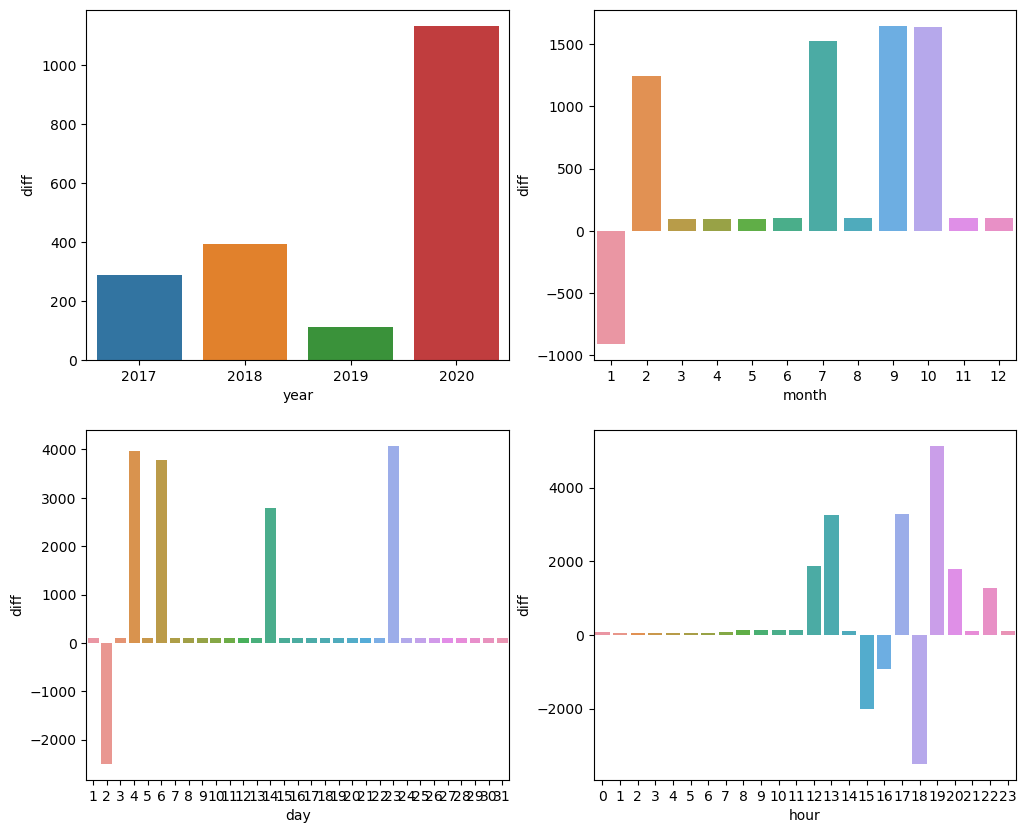

In [100]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='diff', data = train.groupby('year')['diff'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='diff', data = train.groupby('month')['diff'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y = 'diff', data = train.groupby('day')['diff'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='diff', data = train.groupby('hour')['diff'].mean().reset_index())

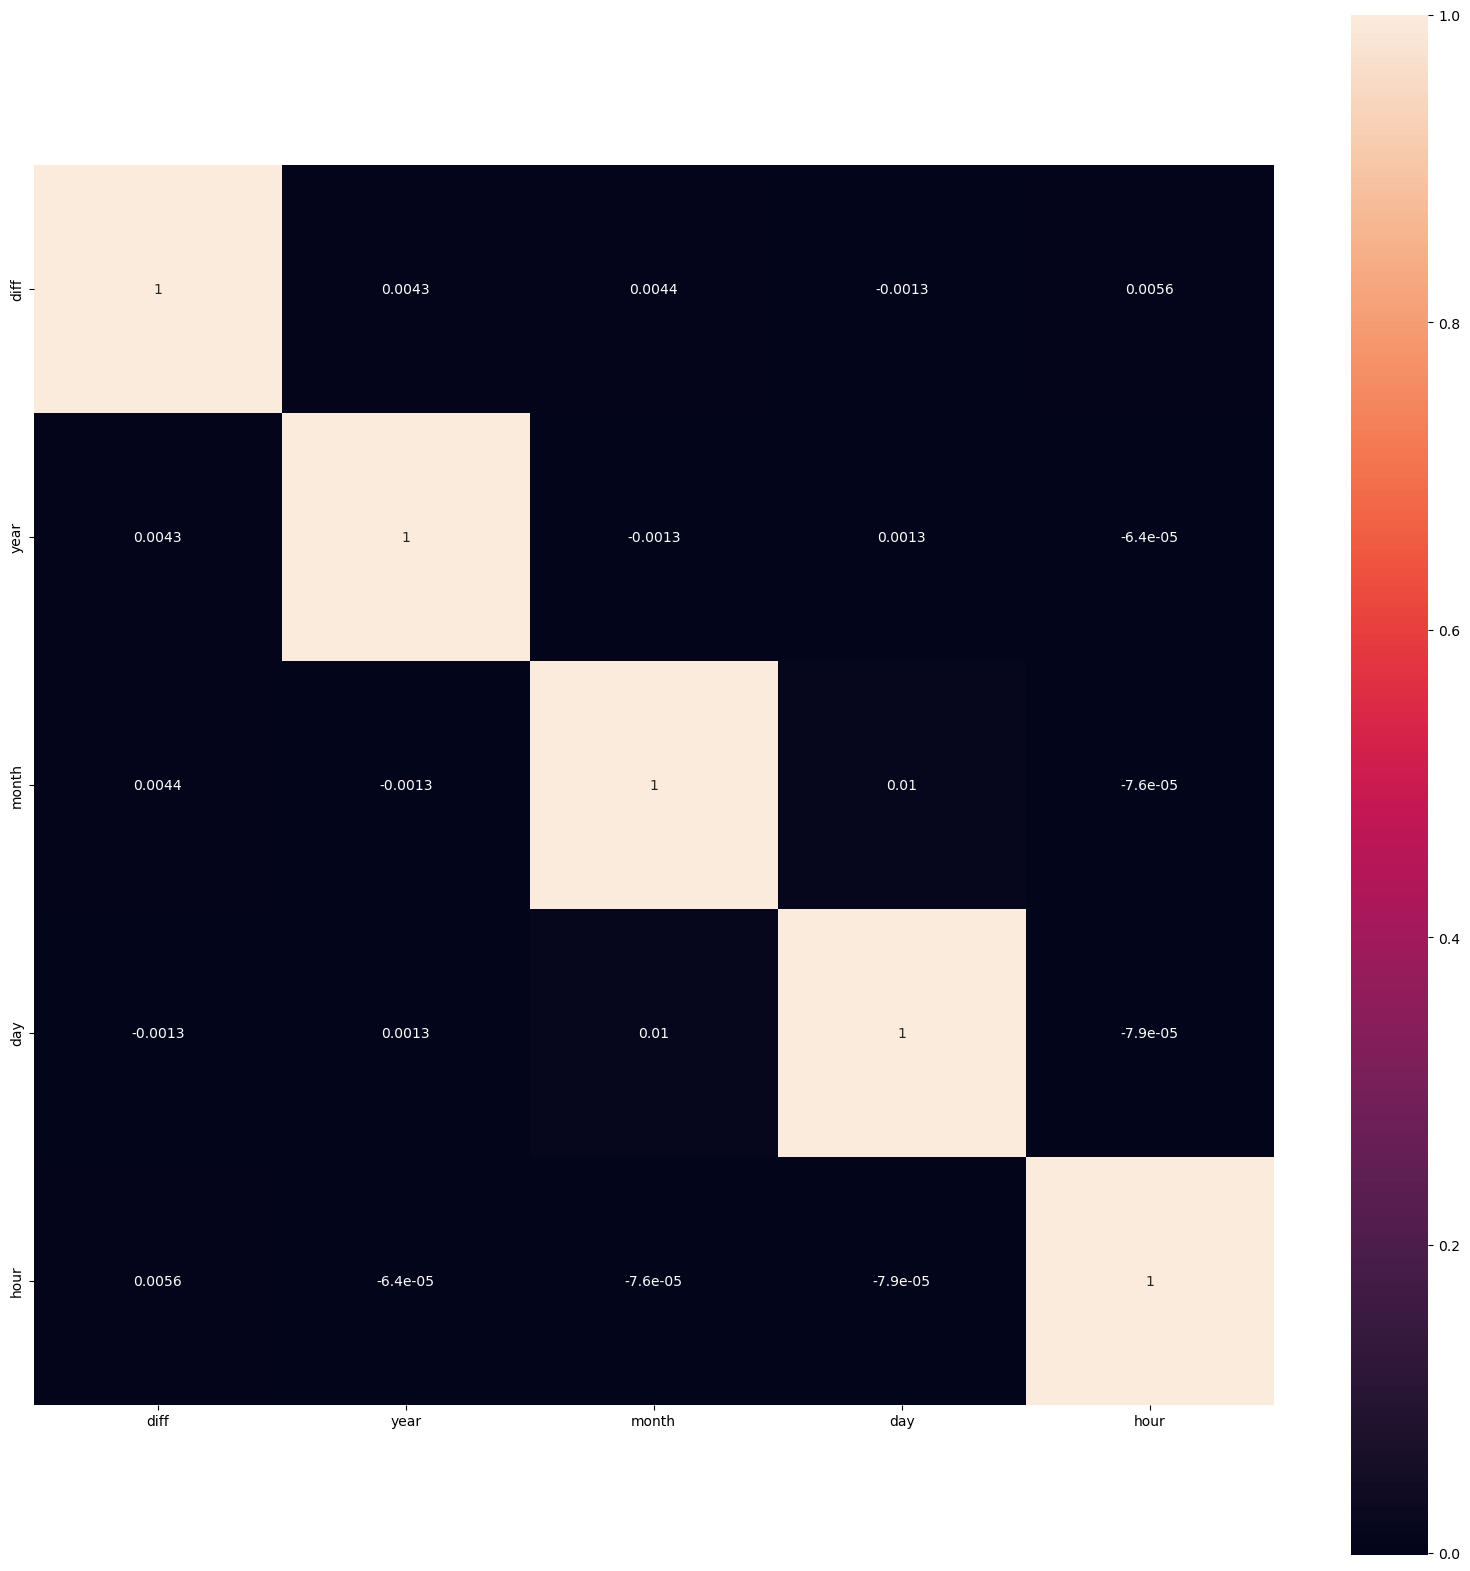

In [101]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(train.corr(), annot=True, square=True)

In [102]:
train.isnull().sum()

datetime     0
diff        11
year         0
month        0
day          0
weekday      0
hour         0
dtype: int64

In [103]:
train = train.dropna(axis=0)

In [104]:
train.isnull().sum()

datetime    0
diff        0
year        0
month       0
day         0
weekday     0
hour        0
dtype: int64

In [105]:
train_2017 = train[train['year']==2017]
train_2018 = train[train['year']==2018]
train_2019 = train[train['year']==2019]
train_2020 = train[train['year']==2020]

In [106]:
train_2019

,datetime,diff,year,month,day,weekday,hour
17519,2019-01-01 00:00:00,71.0,2019,1,1,Tuesday,0
17520,2019-01-01 01:00:00,68.0,2019,1,1,Tuesday,1
17521,2019-01-01 02:00:00,65.0,2019,1,1,Tuesday,2
17522,2019-01-01 03:00:00,62.0,2019,1,1,Tuesday,3
17523,2019-01-01 04:00:00,62.0,2019,1,1,Tuesday,4
...,...,...,...,...,...,...,...
26274,2019-12-31 19:00:00,150.0,2019,12,31,Tuesday,19
26275,2019-12-31 20:00:00,198.0,2019,12,31,Tuesday,20
26276,2019-12-31 21:00:00,76.0,2019,12,31,Tuesday,21
26277,2019-12-31 22:00:00,70.0,2019,12,31,Tuesday,22


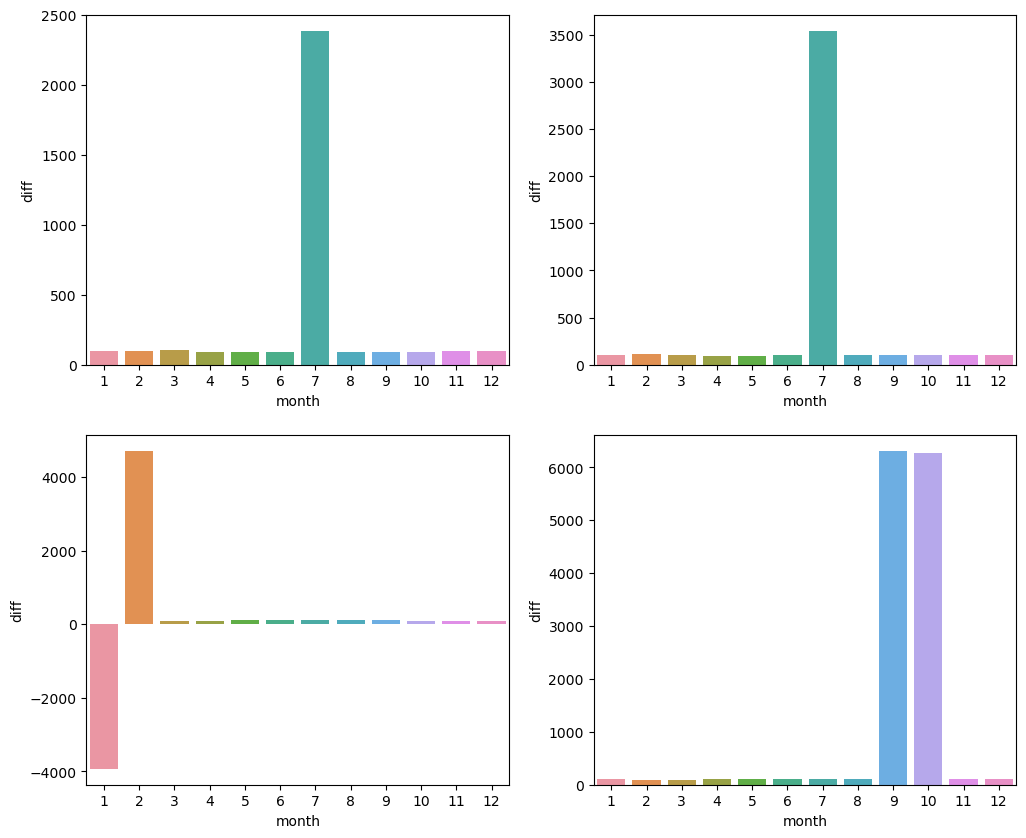

In [107]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='month', y='diff', data = train_2017.groupby('month')['diff'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='diff', data = train_2018.groupby('month')['diff'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='month',y = 'diff', data = train_2019.groupby('month')['diff'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='month',y='diff', data = train_2020.groupby('month')['diff'].mean().reset_index())

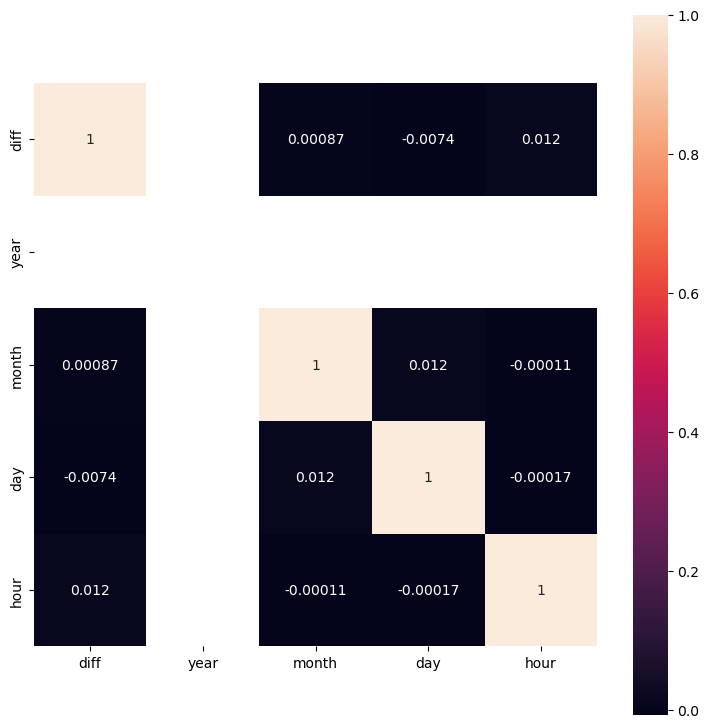

In [108]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.heatmap(train_2017.corr(), annot=True, square=True)
# ax2 = fig.add_subplot(2,2,2)
# ax2 = sns.barplot(x='month', y='diff', data = train_2018.groupby('month')['diff'].mean().reset_index())

# ax3 = fig.add_subplot(2,2,3)
# ax3 = sns.barplot(x='month',y = 'diff', data = train_2019.groupby('month')['diff'].mean().reset_index())

# ax4 = fig.add_subplot(2,2,4)
# ax4 = sns.barplot(x='month',y='diff', data = train_2020.groupby('month')['diff'].mean().reset_index())
# ax = sns.heatmap(train.corr(), annot=True, square=True)

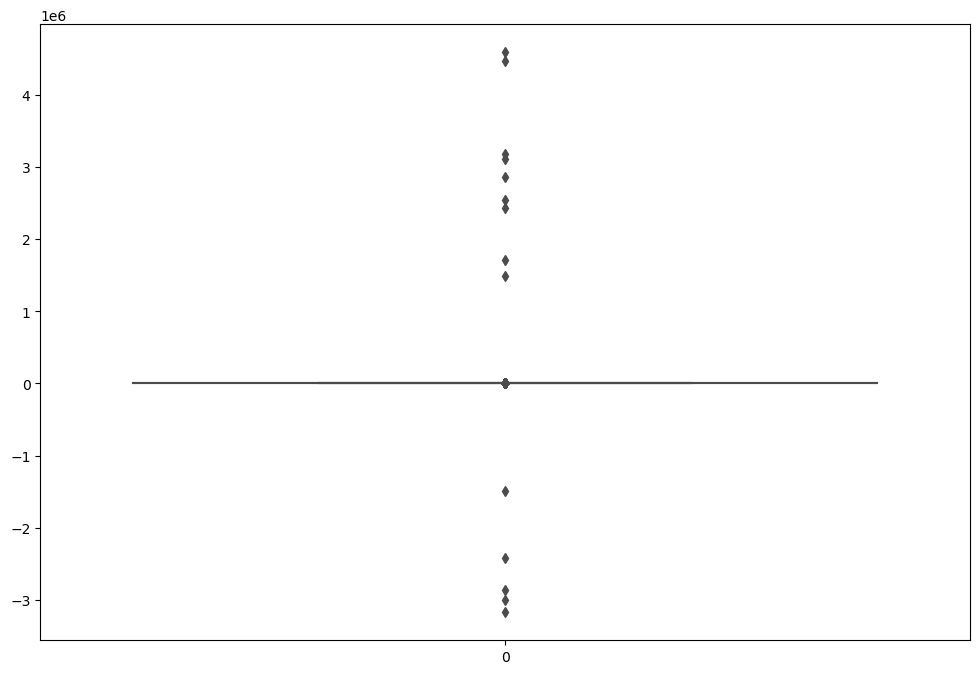

In [109]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train['diff'], color='red')
plt.show()

In [110]:
#diff 값 중 이상치를 제거한 후 정규화거쳐보자
#https://whitewing4139.tistory.com/178

train['diff'].skew()

29.27847215223418

In [111]:
trainWithoutOutliers = train[np.abs(train['diff'] - train['diff'].mean()) <= (3 * train['diff'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(35052, 7)
(35038, 7)


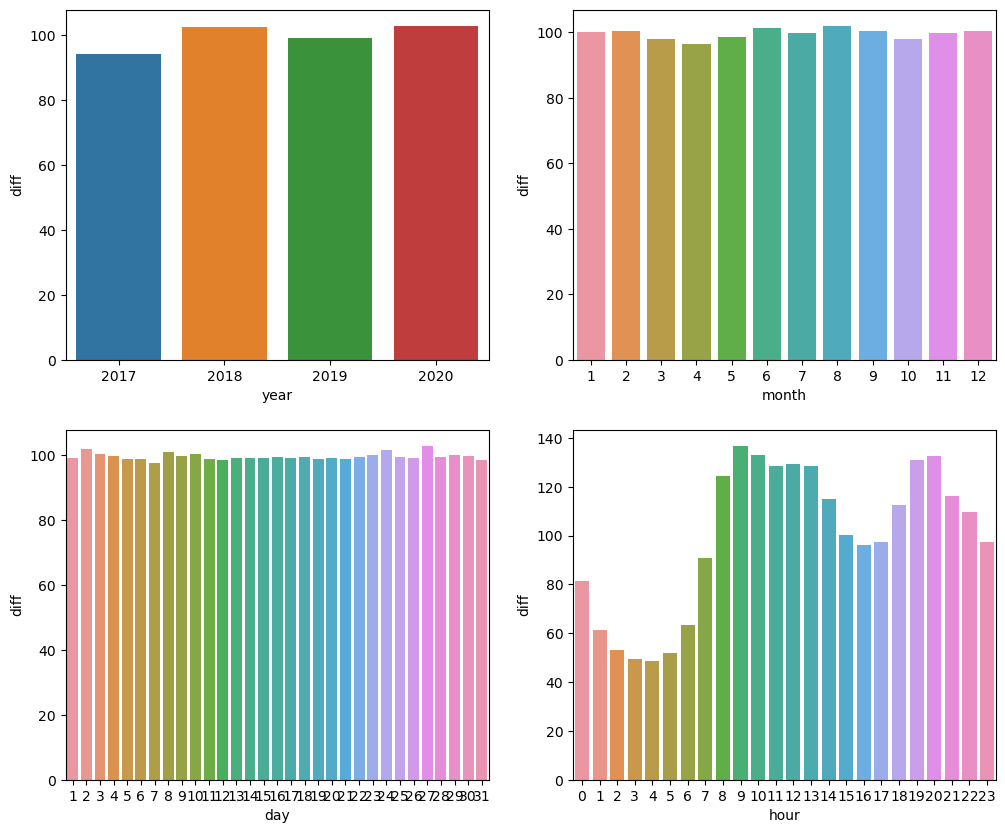

In [112]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='diff', data = trainWithoutOutliers.groupby('year')['diff'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='diff', data = trainWithoutOutliers.groupby('month')['diff'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y = 'diff', data = trainWithoutOutliers.groupby('day')['diff'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='diff', data = trainWithoutOutliers.groupby('hour')['diff'].mean().reset_index())

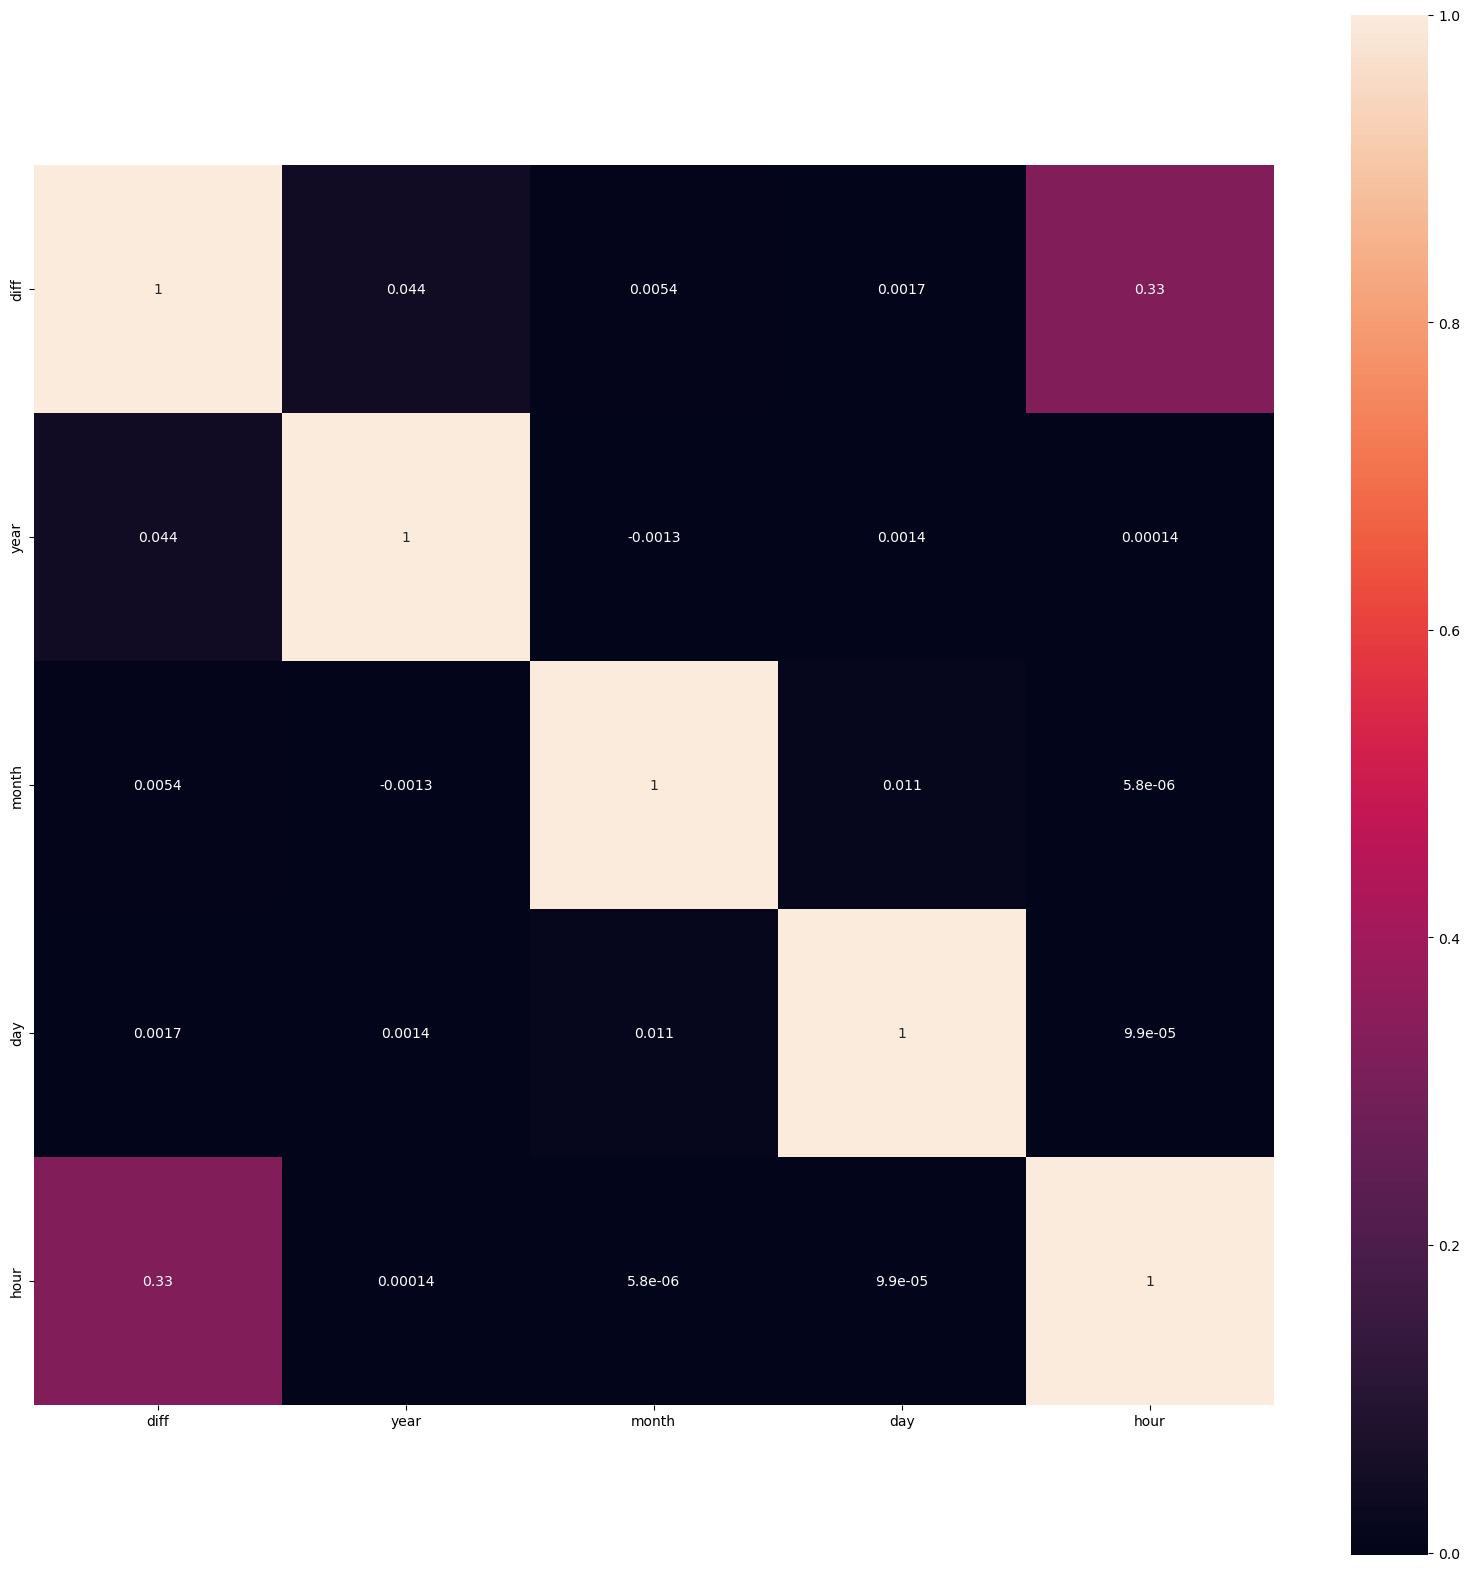

In [113]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(trainWithoutOutliers.corr(), annot=True, square=True)

In [114]:
#시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
train.datetime = pd.to_datetime(train.datetime, errors='coerce')

In [115]:
train = train.sort_values(by=['datetime'])

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35052 entries, 0 to 35062
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35052 non-null  datetime64[ns]
 1   diff      35052 non-null  float64       
 2   year      35052 non-null  int64         
 3   month     35052 non-null  int64         
 4   day       35052 non-null  int64         
 5   weekday   35052 non-null  object        
 6   hour      35052 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.1+ MB


In [117]:
train['new_year']=train.datetime.dt.year

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35052 entries, 0 to 35062
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35052 non-null  datetime64[ns]
 1   diff      35052 non-null  float64       
 2   year      35052 non-null  int64         
 3   month     35052 non-null  int64         
 4   day       35052 non-null  int64         
 5   weekday   35052 non-null  object        
 6   hour      35052 non-null  int64         
 7   new_year  35052 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.4+ MB


In [119]:
train = train.drop('new_year',axis=1)

In [120]:
train = pd.read_csv('data_tr_apo.csv')
test = pd.read_csv('data_ts_apo.csv')

In [121]:
combine = pd.concat([train,test], axis=0)

In [122]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43487 entries, 0 to 8423
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           43487 non-null  object 
 1   구미 아포배수지 유출유량 적산차  43476 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1019.2+ KB


In [123]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [124]:
combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [125]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43487 entries, 0 to 8423
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           43487 non-null  object 
 1   구미 아포배수지 유출유량 적산차  43476 non-null  float64
 2   tempDate           43487 non-null  object 
 3   weekday            43487 non-null  object 
 4   year               43487 non-null  int64  
 5   month              43487 non-null  int64  
 6   day                43487 non-null  int64  
 7   hour               43487 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


In [126]:
combine.columns = ['datetime','diff','tempDate','weekday','year','month','day','hour']

In [127]:
combine.weekday

0       Sunday
1       Sunday
2       Sunday
3       Sunday
4       Sunday
         ...  
8419    Friday
8420    Friday
8421    Friday
8422    Friday
8423    Friday
Name: weekday, Length: 43487, dtype: object

In [128]:
combine.head()

,datetime,diff,tempDate,weekday,year,month,day,hour
0,2017-01-01 01:00:00,131.0,"[2017-01-01, 01:00:00]",Sunday,2017,1,1,1
1,2017-01-01 02:00:00,64.0,"[2017-01-01, 02:00:00]",Sunday,2017,1,1,2
2,2017-01-01 03:00:00,52.0,"[2017-01-01, 03:00:00]",Sunday,2017,1,1,3
3,2017-01-01 04:00:00,50.0,"[2017-01-01, 04:00:00]",Sunday,2017,1,1,4
4,2017-01-01 05:00:00,49.0,"[2017-01-01, 05:00:00]",Sunday,2017,1,1,5


In [133]:
combine['weekday'][combine['weekday']=='Sunday']=0
combine['weekday'][combine['weekday']=='Monday']=1
combine['weekday'][combine['weekday']=='Tuesday']=2
combine['weekday'][combine['weekday']=='Wednesday']=3
combine['weekday'][combine['weekday']=='Thursday']=4
combine['weekday'][combine['weekday']=='Friday']=5
combine['weekday'][combine['weekday']=='Saturday']=6

In [134]:
combine.weekday = combine.weekday.astype('category')

In [135]:
combine.isnull().sum()

datetime     0
diff        11
tempDate     0
weekday      0
year         0
month        0
day          0
hour         0
dtype: int64

In [136]:
#데이터 정규화
# 이후 빈 값에 대해 randomforest regressor 적용
combine = combine.dropna(axis=0)

In [137]:
combine.isnull().sum()

datetime    0
diff        0
tempDate    0
weekday     0
year        0
month       0
day         0
hour        0
dtype: int64

In [138]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43476 entries, 0 to 8423
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   datetime  43476 non-null  object  
 1   diff      43476 non-null  float64 
 2   tempDate  43476 non-null  object  
 3   weekday   43476 non-null  category
 4   year      43476 non-null  int64   
 5   month     43476 non-null  int64   
 6   day       43476 non-null  int64   
 7   hour      43476 non-null  int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 2.7+ MB


In [139]:
categorizational_columns = ['year','month','day','hour']

In [140]:
for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [141]:
combine['datetime'] = pd.to_datetime(combine['datetime'])

In [142]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43476 entries, 0 to 8423
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  43476 non-null  datetime64[ns]
 1   diff      43476 non-null  float64       
 2   tempDate  43476 non-null  object        
 3   weekday   43476 non-null  category      
 4   year      43476 non-null  category      
 5   month     43476 non-null  category      
 6   day       43476 non-null  category      
 7   hour      43476 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


In [143]:
combine = combine.drop(['tempDate'], axis=1)

In [144]:
train = combine[combine['datetime']<'20210101']

In [145]:
test = combine[combine['datetime']>='20210101']

In [146]:
test.head()

,datetime,diff,weekday,year,month,day,hour
0,2021-01-01 00:00:00,67.0,5,2021,1,1,0
1,2021-01-01 01:00:00,70.0,5,2021,1,1,1
2,2021-01-01 02:00:00,67.0,5,2021,1,1,2
3,2021-01-01 03:00:00,59.0,5,2021,1,1,3
4,2021-01-01 04:00:00,58.0,5,2021,1,1,4


In [147]:
train.tail()

,datetime,diff,weekday,year,month,day,hour
35058,2020-12-31 19:00:00,237.0,4,2020,12,31,19
35059,2020-12-31 20:00:00,92.0,4,2020,12,31,20
35060,2020-12-31 21:00:00,82.0,4,2020,12,31,21
35061,2020-12-31 22:00:00,82.0,4,2020,12,31,22
35062,2020-12-31 23:00:00,74.0,4,2020,12,31,23


In [148]:
train.head()

,datetime,diff,weekday,year,month,day,hour
0,2017-01-01 01:00:00,131.0,0,2017,1,1,1
1,2017-01-01 02:00:00,64.0,0,2017,1,1,2
2,2017-01-01 03:00:00,52.0,0,2017,1,1,3
3,2017-01-01 04:00:00,50.0,0,2017,1,1,4
4,2017-01-01 05:00:00,49.0,0,2017,1,1,5


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35052 entries, 0 to 35062
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35052 non-null  datetime64[ns]
 1   diff      35052 non-null  float64       
 2   weekday   35052 non-null  category      
 3   year      35052 non-null  category      
 4   month     35052 non-null  category      
 5   day       35052 non-null  category      
 6   hour      35052 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1)
memory usage: 995.6 KB


In [150]:
train.isnull().sum()

datetime    0
diff        0
weekday     0
year        0
month       0
day         0
hour        0
dtype: int64

In [151]:
train['diff'][train[train['diff']<0].index]=0

In [152]:
test['diff'][test[test['diff']<0].index]=0

In [154]:
def rmsle(y, y_, convertExp = True):
    if convertExp:
        y=np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2)**2
    return np.sqrt(np.mean(calc))

In [155]:
# pip install sklearn

In [156]:
#데이터 훈련 시 집어 넣을 결과값들
datetimecol = test['datetime']
yLabels = train['diff']

In [157]:
train['datetime'] = pd.to_numeric(train['datetime'])
test['datetime'] = pd.to_numeric(test['datetime'])

In [161]:
train = train.drop(['datetime'],axis=1)
test = test.drop(['datetime'], axis=1)
combine = combine.drop(['datetime'], axis=1)

In [165]:
#선형회귀 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()

yLabelslog = np.log1p(yLabels)
# print(yLabelslog[yLabelslog.isnull()])
lr.fit(train, yLabelslog)
preds = lr.predict(train)
print('RMSLE Value for linear Regression : {}'.format(rmsle(np.exp(yLabelslog), np.exp(preds), False)))

RMSLE Value for linear Regression : 0.39363563607476443


In [170]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge = Ridge()

ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge = GridSearchCV(ridge, ridge_params, scoring = rmsle_scorer, cv=5)
grid_ridge.fit(train, yLabelslog)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

{'alpha': 1000, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.39363563607476443


In [171]:
#Ridge모델은 L1제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(train,yLabelslog)
preds = grid_lasso.predict(train)
print(grid_lasso.best_params_)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.3942353640860451


In [173]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds = grid_rf.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for RandomForest 0.0038502346891626568


In [174]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train,yLabelslog)
preds = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for GradientBoosting 1.2560319898390284e-05
